In [81]:
#removes all non capitalized letters, 
def strip_string(string):
    import re
    return(re.sub(r"[^A-Z,]", '', string))

def URL_to_name(string):
    return(string[32:-1])

def count_unique(ls):
    from collections import Counter
    #Counter(ls).keys() # equals to list(set(words))
    #Counter(ls).values() # counts the elements' frequency
    count_dict = dict(Counter(ls).items())
    return(count_dict)

def split_list(string):
    ls = string.split(",")
    return(ls)

# Importing csv as pd.df
import pandas as pd
import numpy as np
df = pd.read_csv("/home/simon/Git/metadata_scraper/metadata_presentations.csv")
# transfering to new df_clean
df_clean = df[['URL', 'Relation/s']]
# dropping all courses where Relation is undefined
df_clean = df_clean.dropna()


#Clean up name of courses
url_names_ls = []
for entry in df_clean["URL"]:
    url_names_ls.append(URL_to_name(entry))
df_clean["names"] = url_names_ls

# Adding column "rel_tags" of relations with only string w/ relations
meta_relations_tags = []
for entry in df_clean["Relation/s"]:
    meta_relations_tags.append(strip_string(entry))
df_clean["rel_tags"] = meta_relations_tags




#setting all entries to NaN where relation was incorrectly filled out
df_clean = df_clean.replace("",np.NaN)
#dropping those incorrect relations from df
df_clean = df_clean.dropna()
# dropping "Relation/s" column from list
df_clean = df_clean.drop(["URL","Relation/s"], axis = 1)

print(df_clean)

rel_ls = []
for i in df_clean["rel_tags"]:
    rel_ls.append(split_list(i))
df_clean["rel_ls"] = rel_ls


for i in df_clean["rel_ls"]:
    print(count_unique(i))

                                                names  \
0                      PLUS_Practice-Image-Processing   
2                      VITO_Data_Access_In_Terrascope   
4                        GISIG_Introduction_to_EO4GEO   
5   SpaSe_OBIA-for-Operations-Copernicus-Service-C...   
13  UT-ITC_Satellite_Data_Classification_Random_Fo...   
14  UT-ITC_Satellite_Data_Classification_Decision_...   
15                      UNEP-GRID_Introduction-to-GIS   
17                    KULeuven_Management-View-on-SDI   
27                  UNIBAS_Remote-Sensing-Environment   
30  UJI_Reproducible-Research-Practices-in-Geoscie...   
33                             PLUS_OBIA-Introduction   

                                             rel_tags  
0                                            TA,TA,GS  
2                                            TA,TA,GS  
4                                            OI,OI,OI  
5   TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,T...  
13                                 

In [78]:
df_clean

,names,rel_tags,rel_ls
0,PLUS_Practice-Image-Processing,"TA,TA,GS","[TA, TA, GS]"
2,VITO_Data_Access_In_Terrascope,"TA,TA,GS","[TA, TA, GS]"
4,GISIG_Introduction_to_EO4GEO,"OI,OI,OI","[OI, OI, OI]"
5,SpaSe_OBIA-for-Operations-Copernicus-Service-C...,"TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,TA,T...","[TA, TA, TA, TA, TA, TA, TA, TA, TA, TA, TA, T..."
13,UT-ITC_Satellite_Data_Classification_Random_Fo...,"TA,TA,GS","[TA, TA, GS]"
14,UT-ITC_Satellite_Data_Classification_Decision_...,"TA,TA,GS","[TA, TA, GS]"
15,UNEP-GRID_Introduction-to-GIS,"DM,DM,GD,AM,AM,AM,CF,CV","[DM, DM, GD, AM, AM, AM, CF, CV]"
17,KULeuven_Management-View-on-SDI,OI,[OI]
27,UNIBAS_Remote-Sensing-Environment,",,","[, , ]"
30,UJI_Reproducible-Research-Practices-in-Geoscie...,"GC,IP","[GC, IP]"


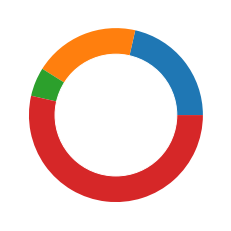

In [79]:
"""CHARTS STANDARD"""

# library
import matplotlib.pyplot as plt
 
# create data
size_of_groups=[12,11,3,30]
 
# Create a pieplot
plt.pie(size_of_groups)
#plt.show()
 
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
 
plt.show()